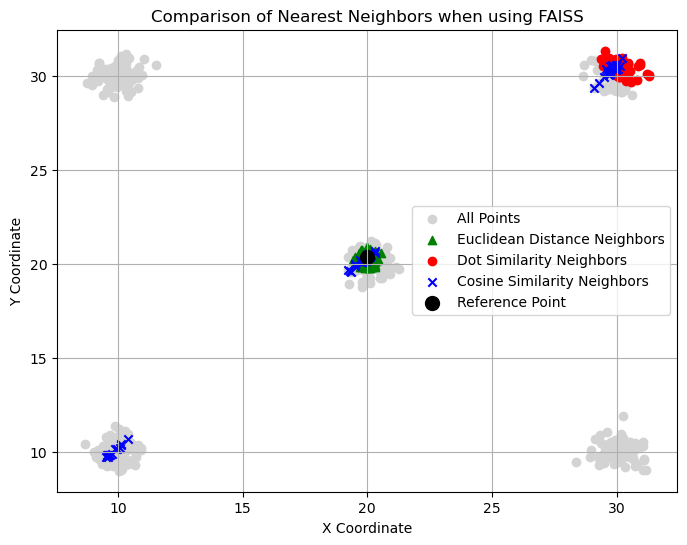

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import faiss

# Define parameters
num_points_per_community = 100
num_communities = 5
dim = 2  # 2D space
neighbors_count = 50  # Number of neighbors to retrieve

# Generate 5 well-separated communities in 2D space
np.random.seed(42)  # For reproducibility
community_centers = np.array([[10, 10], [30, 10], [10, 30], [30, 30], [20, 20]])
data = np.vstack([
    center + np.random.randn(num_points_per_community, dim) * 0.5  # Spread out points
    for center in community_centers
])

# Choose one point from the first community as the reference point
reference_index = np.random.choice(num_points_per_community)
reference_index = 420
reference_point = data[reference_index]

# Initialize FAISS indices for different metrics
index_dot = faiss.IndexFlatIP(dim)  # Dot similarity
index_cosine = faiss.IndexFlatIP(dim)  # Cosine similarity
index_euclidean = faiss.IndexFlatL2(dim)  # Euclidean distance

# Normalize data for cosine similarity
data_normalized = data / np.linalg.norm(data, axis=1, keepdims=True)

# Add data to FAISS indices
index_dot.add(data.astype(np.float32))  # Dot product index
index_cosine.add(data_normalized.astype(np.float32))  # Cosine similarity index with normalized data
index_euclidean.add(data.astype(np.float32))  # Euclidean distance index

# Get 100 neighbors using each metric
_, dot_neighbors = index_dot.search(np.array([reference_point], dtype=np.float32), neighbors_count)
_, cosine_neighbors = index_cosine.search(np.array([reference_point / np.linalg.norm(reference_point)], dtype=np.float32), neighbors_count)
_, euclidean_neighbors = index_euclidean.search(np.array([reference_point], dtype=np.float32), neighbors_count)

# Plotting
plt.figure(figsize=(8, 6))

# Plot all points in gray for context
plt.scatter(data[:, 0], data[:, 1], color='lightgray', label="All Points")

# Highlight the reference point

# Plot neighbors found by each metric with different markers and colors
plt.scatter(data[euclidean_neighbors[0], 0], data[euclidean_neighbors[0], 1], color='green', marker='^', label="Euclidean Distance Neighbors")
plt.scatter(data[dot_neighbors[0], 0], data[dot_neighbors[0], 1], color='red', marker='o', label="Dot Similarity Neighbors")
plt.scatter(data[cosine_neighbors[0], 0], data[cosine_neighbors[0], 1], color='blue', marker='x', label="Cosine Similarity Neighbors")
plt.scatter(reference_point[0], reference_point[1], color='black', s=100, label="Reference Point")

# Labeling and formatting
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Comparison of Nearest Neighbors when using FAISS")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [44]:
import sys
sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.nets_and_embeddings import create_and_save_network_and_embedding
#from scripts.clustering_methods import clustering_method_values
from scripts.nets_and_embeddings import load_net_and_embedding

N=10000
mu_values = np.round(np.arange(0.05, 1.05, 0.05),decimals=2)

params = {
    "N": N,
    "k": 50,
    "maxk":  int(np.sqrt(10 * N)),
    "minc": 50,
    "maxc": int(np.ceil(np.sqrt(N * 10))),
    "tau": 3.0,
    "tau2": 1.0,
    "mu": 0.2,
    }


emb_params = {
    "method": "node2vec",
    "window_length": 10,
    "walk_length": 80,
    "num_walks": 10,
    "dim": 64,
}

run_no = 1
path_name= f"/nobackup/gogandhi/alt_means_sans_k/data/experiment_mu_change_{params['N']}_{params['k']}_3.0_minc50/Run_{run_no}/"
#path_name = f"/nobackup/gogandhi/alt_means_sans_k/data/experiment_mu_change_{params['N']}_{params['k']}_3.0_immutable/Run_{run_no}/"
#community_table_LFR_n_1000_tau1_3.0_tau2_1.0_mu_0.0_k_10_mincomm_5.npz
#"community_table_LFR_n_10000_tau1_3.0_tau2_1.0_mu_0.1_k_50_mincomm_50.npz"

net, community_table, emb = load_net_and_embedding(params, emb_params, path_name)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
import umap  # Make sure to install UMAP with `pip install umap-learn`

# Define parameters

# Assume `emb` is already loaded as a 10000x64 matrix
emb = np.array(emb)  # Ensure `emb` is a NumPy array
dim = emb.shape[1]  # 64 dimensions

# Dimensionality Reduction using UMAP for Visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
emb_2d = umap_reducer.fit_transform(emb)

Neighbor Similarity Matrix (Jaccard Similarity):
[[1.         0.31578947 0.25786164]
 [0.31578947 1.         0.83486239]
 [0.25786164 0.83486239 1.        ]]


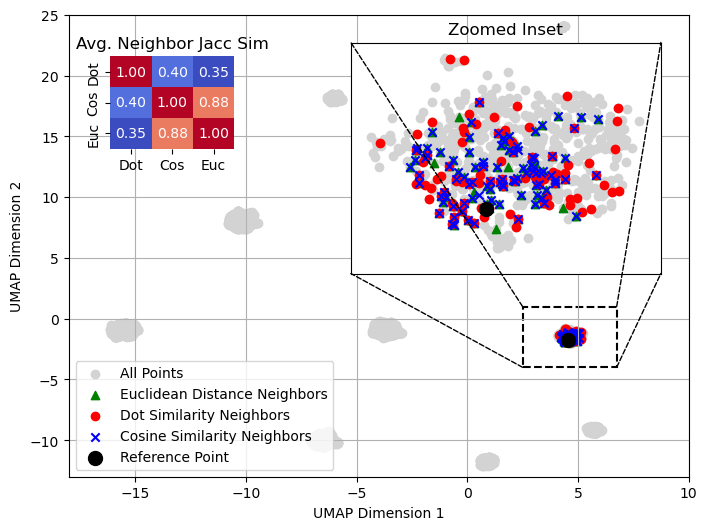

In [186]:
# Choose a reference point from `emb`
np.random.seed(42)  # For reproducibility
reference_index = np.random.choice(emb.shape[0])
reference_point = emb[reference_index]

# Initialize FAISS indices for different metrics
index_dot = faiss.IndexFlatIP(dim)  # Dot similarity
index_cosine = faiss.IndexFlatIP(dim)  # Cosine similarity
index_euclidean = faiss.IndexFlatL2(dim)  # Euclidean distance

# Normalize data for cosine similarity
emb_normalized = emb / np.linalg.norm(emb, axis=1, keepdims=True)

# Add data to FAISS indices
index_dot.add(emb.astype(np.float32))  # Dot product index
index_cosine.add(emb_normalized.astype(np.float32))  # Cosine similarity index with normalized data
index_euclidean.add(emb.astype(np.float32))  # Euclidean distance index



neighbors_count = 100  # Number of neighbors to retrieve


# Get 100 neighbors using each metric
_, dot_neighbors = index_dot.search(np.array([reference_point], dtype=np.float32), neighbors_count)
_, cosine_neighbors = index_cosine.search(np.array([reference_point / np.linalg.norm(reference_point)], dtype=np.float32), neighbors_count)
_, euclidean_neighbors = index_euclidean.search(np.array([reference_point], dtype=np.float32), neighbors_count)

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

# Get the 2D coordinates of the reference point and neighbors
reference_point_2d = emb_2d[reference_index]
dot_neighbors_2d = emb_2d[dot_neighbors[0]]
cosine_neighbors_2d = emb_2d[cosine_neighbors[0]]
euclidean_neighbors_2d = emb_2d[euclidean_neighbors[0]]

avg_similarity_matrix = np.zeros((3, 3))
metrics = ["Dot", "Cos", "Euc"]

# Calculate similarity for each point and accumulate
for reference_index in range(num_points):
    # Get neighbors for each metric
    _, dot_neighbors = index_dot.search(np.array([emb[reference_index]], dtype=np.float32), neighbors_count)
    _, cosine_neighbors = index_cosine.search(np.array([emb_normalized[reference_index]], dtype=np.float32), neighbors_count)
    _, euclidean_neighbors = index_euclidean.search(np.array([emb[reference_index]], dtype=np.float32), neighbors_count)

    # Create neighbor sets
    neighbors_sets = {
        "Dot": set(dot_neighbors[0]),
        "Cos": set(cosine_neighbors[0]),
        "Euc": set(euclidean_neighbors[0])
    }

    # Calculate Jaccard similarity for each pair of metrics
    similarity_matrix = np.zeros((3, 3))
    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            intersection = neighbors_sets[metric1].intersection(neighbors_sets[metric2])
            union = neighbors_sets[metric1].union(neighbors_sets[metric2])
            similarity_matrix[i, j] = len(intersection) / len(union) if union else 0

    # Accumulate the similarity matrix
    avg_similarity_matrix += similarity_matrix

# Average the similarity matrix
avg_similarity_matrix_emb = avg_similarity_matrix/num_points

print("Neighbor Similarity Matrix (Jaccard Similarity):")
print(similarity_matrix)

# Plotting with Inset
fig, ax = plt.subplots(figsize=(8, 6))

# Main scatter plot for all points in light gray
ax.scatter(emb_2d[:, 0], emb_2d[:, 1], color='lightgray', label="All Points")

# Plot neighbors for each metric with different markers and colors
ax.scatter(euclidean_neighbors_2d[:, 0], euclidean_neighbors_2d[:, 1], color='green', marker='^', label="Euclidean Distance Neighbors")
ax.scatter(dot_neighbors_2d[:, 0], dot_neighbors_2d[:, 1], color='red', marker='o', label="Dot Similarity Neighbors")
ax.scatter(cosine_neighbors_2d[:, 0], cosine_neighbors_2d[:, 1], color='blue', marker='x', label="Cosine Similarity Neighbors")

# Highlight the reference point
ax.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100, label="Reference Point")

ax.set_xlim(-18, 10)
ax.set_ylim(-13, 25)

# Add zoomed inset
axins = inset_axes(ax, width="50%", height="50%", loc="upper right", borderpad=2)



axins.scatter(emb_2d[:, 0], emb_2d[:, 1], color='lightgray')
axins.scatter(euclidean_neighbors_2d[:, 0], euclidean_neighbors_2d[:, 1], color='green', marker='^')
axins.scatter(dot_neighbors_2d[:, 0], dot_neighbors_2d[:, 1], color='red', marker='o')
axins.scatter(cosine_neighbors_2d[:, 0], cosine_neighbors_2d[:, 1], color='blue', marker='x')
axins.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100)


# Set inset limits
axins.set_xlim(4, 5.3)
axins.set_ylim(-2.2, -0.7)
axins.set_xticks([])
axins.set_yticks([])
axins.set_title("Zoomed Inset")

# Set inset limits
x1, x2, y1, y2 = 2.5, 6.75, -4, 1

# Draw a rectangle on the main plot to indicate the zoomed-in area
rect = Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor="black", linestyle="--", linewidth=1.5, facecolor="none")
ax.add_patch(rect)

# Draw lines connecting the rectangle corners to the inset
for sp, ep in zip([(x1, y1), (x1, y2)], [(0, 0), (0, 1)]):  # Lower-left and upper-left corners
    con = ConnectionPatch(xyA=sp, coordsA=ax.transData, xyB=ep, coordsB=axins.transAxes, color="black", linestyle="--")
    axins.add_artist(con)

for sp, ep in zip([(x2, y1), (x2, y2)], [(1, 0), (1, 1)]):  # Lower-right and upper-right corners
    con = ConnectionPatch(xyA=sp, coordsA=ax.transData, xyB=ep, coordsB=axins.transAxes, color="black", linestyle="--")
    axins.add_artist(con)



# Add similarity matrix heatmap inset
axins_heatmap = inset_axes(ax, width="20%", height="20%", loc="upper left", borderpad=3)
sns.heatmap(avg_similarity_matrix_emb, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=axins_heatmap)
axins_heatmap.set_title("Avg. Neighbor Jacc Sim")

# Main plot labels and formatting
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
#ax.set_title("Comparison of Nearest Neighbors by Metric")
ax.legend(loc="lower left")
ax.grid(True)
plt.savefig("/nobackup/gogandhi/alt_means_sans_k/results/Changing clustering metric/comparing_neighbors_metric.png",dpi=300,bbox_inches="tight")
plt.show()


## Why is embedding data giving this feature while randomly generated clusters are not? Maybe it's the high dimensionality?

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import faiss
import seaborn as sns
import umap

# Sample data structure for `community_table`
# community_table = pd.DataFrame({
#     "node_id": np.arange(len(emb)),  # Indices corresponding to `emb`
#     "community_id": np.random.randint(0, num_communities, size=len(emb))
# })

# Define parameters
neighbors_count = 100  # Number of neighbors to retrieve
num_communities = community_table['community_id'].nunique()

# Calculate community centers in the original 64-dimensional embedding space
community_centers_2d = community_table.groupby('community_id')['node_id'].apply(
    lambda nodes: emb_2d[nodes].mean(axis=0)
).values

# Step 2: Generate 2D Dataset Based on UMAP-reduced Community Centers of `emb`
# Perform UMAP reduction on `emb` for 2D visualization
#umap_reducer = umap.UMAP(n_components=2, random_state=42)
#emb_2d = umap_reducer.fit_transform(emb)

# Map the 64D centers to 2D for visualization
#community_centers_2d = umap_reducer.transform(np.array(community_centers))

# Generate 2D dataset with each point around their community center
np.random.seed(42)
num_points_per_community = len(emb) // num_communities
data_2d = np.vstack([
    center + np.random.randn(num_points_per_community, 2) * 0.5  # Slight spread
    for center in community_centers_2d
])

# Step 3: Initialize FAISS indices and perform neighbor similarity calculations
# Define FAISS indices for dot product, cosine similarity, and Euclidean distance in 2D
index_dot_2d = faiss.IndexFlatIP(2)
index_cosine_2d = faiss.IndexFlatIP(2)
index_euclidean_2d = faiss.IndexFlatL2(2)

# Normalize data for cosine similarity
data_2d_normalized = data_2d / np.linalg.norm(data_2d, axis=1, keepdims=True)

# Add data to FAISS indices
index_dot_2d.add(data_2d.astype(np.float32))
index_cosine_2d.add(data_2d_normalized.astype(np.float32))
index_euclidean_2d.add(data_2d.astype(np.float32))

# Initialize average similarity matrix
avg_similarity_matrix = np.zeros((3, 3))
metrics = ["Dot", "Cos", "Euc"]

# Calculate similarity for each node and accumulate
for reference_index in range(len(data_2d)):
    _, dot_neighbors = index_dot_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)
    _, cosine_neighbors = index_cosine_2d.search(np.array([data_2d_normalized[reference_index]], dtype=np.float32), neighbors_count)
    _, euclidean_neighbors = index_euclidean_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)

    # Create neighbor sets
    neighbors_sets = {
        "Dot": set(dot_neighbors[0]),
        "Cos": set(cosine_neighbors[0]),
        "Euc": set(euclidean_neighbors[0])
    }

    # Calculate Jaccard similarity for each pair of metrics
    similarity_matrix = np.zeros((3, 3))
    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            intersection = neighbors_sets[metric1].intersection(neighbors_sets[metric2])
            union = neighbors_sets[metric1].union(neighbors_sets[metric2])
            similarity_matrix[i, j] = len(intersection) / len(union) if union else 0

    # Accumulate the similarity matrix
    avg_similarity_matrix += similarity_matrix

# Average the similarity matrix across all nodes
avg_similarity_matrix /= len(data_2d)

print("Average Neighbor Similarity Matrix (Jaccard Similarity):")
print(avg_similarity_matrix)

Average Neighbor Similarity Matrix (Jaccard Similarity):
[[1.         0.05018502 0.04514615]
 [0.05018502 1.         0.31712879]
 [0.04514615 0.31712879 1.        ]]


/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


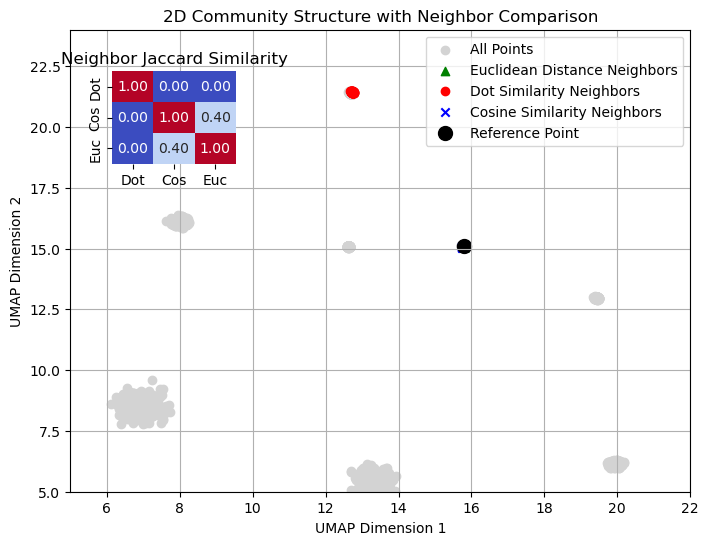

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import faiss
import umap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle, ConnectionPatch

# Parameters
neighbors_count = 100
num_clusters = community_table['community_id'].nunique()

# Step 1: Perform UMAP reduction on `emb` to obtain 2D coordinates for each point in `emb`
umap_reducer = umap.UMAP(n_components=2, random_state=42)
emb_2d = umap_reducer.fit_transform(emb)

# Step 2: Calculate 2D cluster centers and spreads based on `emb_2d`
community_stats_2d = community_table.groupby('community_id')['node_id'].apply(
    lambda nodes: (emb_2d[nodes].mean(axis=0), emb_2d[nodes].std(axis=0))
)

# Separate centers and spreads for easier use
cluster_centers_2d = np.vstack([stat[0] for stat in community_stats_2d])
cluster_spreads_2d = np.vstack([stat[1] for stat in community_stats_2d])

# Step 3: Generate synthetic 2D data based on these centers and spreads
np.random.seed(42)
num_points_per_cluster = len(emb) // num_clusters
data_2d = np.vstack([
    center + np.random.randn(num_points_per_cluster, 2) * spread  # Use inferred 2D spread
    for center, spread in zip(cluster_centers_2d, cluster_spreads_2d)
])

# Step 4: Initialize FAISS indices in 2D space
index_dot_2d = faiss.IndexFlatIP(2)         # Dot product similarity
index_cosine_2d = faiss.IndexFlatIP(2)      # Cosine similarity (normalize data)
index_euclidean_2d = faiss.IndexFlatL2(2)   # Euclidean distance

# Normalize synthetic data for cosine similarity
data_2d_normalized = data_2d / np.linalg.norm(data_2d, axis=1, keepdims=True)

# Add data to FAISS indices
index_dot_2d.add(data_2d.astype(np.float32))
index_cosine_2d.add(data_2d_normalized.astype(np.float32))
index_euclidean_2d.add(data_2d.astype(np.float32))

# Choose a reference point and find neighbors in 2D space
reference_index = 2900  # Example index
reference_point_2d = data_2d[reference_index]

# Retrieve neighbors in 2D
_, dot_neighbors = index_dot_2d.search(np.array([reference_point_2d], dtype=np.float32), neighbors_count)
_, cosine_neighbors = index_cosine_2d.search(np.array([data_2d_normalized[reference_index]], dtype=np.float32), neighbors_count)
_, euclidean_neighbors = index_euclidean_2d.search(np.array([reference_point_2d], dtype=np.float32), neighbors_count)

# Step 5: Plotting with Inset for similarity matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Main scatter plot for all points in light gray
ax.scatter(data_2d[:, 0], data_2d[:, 1], color='lightgray', label="All Points")

# Plot neighbors for each metric with different markers and colors
ax.scatter(data_2d[euclidean_neighbors[0], 0], data_2d[euclidean_neighbors[0], 1], color='green', marker='^', label="Euclidean Distance Neighbors")
ax.scatter(data_2d[dot_neighbors[0], 0], data_2d[dot_neighbors[0], 1], color='red', marker='o', label="Dot Similarity Neighbors")
ax.scatter(data_2d[cosine_neighbors[0], 0], data_2d[cosine_neighbors[0], 1], color='blue', marker='x', label="Cosine Similarity Neighbors")

# Highlight the reference point
ax.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100, label="Reference Point")

# Set axis labels and limits
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
#ax.set_title("2D Community Structure with Neighbor Comparison")
ax.set_xlim(5, 22)
ax.set_ylim(5, 24) 
ax.legend(loc="best")
ax.grid(True)

# Step 6: Calculate Jaccard similarity between neighbors and add similarity matrix heatmap
neighbors_sets = {
    "Dot": set(dot_neighbors[0]),
    "Cos": set(cosine_neighbors[0]),
    "Euc": set(euclidean_neighbors[0])
}
similarity_matrix = np.zeros((3, 3))
metrics = ["Dot", "Cos", "Euc"]
for i, metric1 in enumerate(metrics):
    for j, metric2 in enumerate(metrics):
        intersection = neighbors_sets[metric1].intersection(neighbors_sets[metric2])
        union = neighbors_sets[metric1].union(neighbors_sets[metric2])
        similarity_matrix[i, j] = len(intersection) / len(union) if union else 0

# Add similarity matrix heatmap inset
axins_heatmap = inset_axes(ax, width="20%", height="20%", loc="upper left", borderpad=3)
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=axins_heatmap)
axins_heatmap.set_title("Neighbor Jaccard Similarity")
plt.show()


In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import faiss
import umap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Parameters
neighbors_count = 100

# Step 1: Calculate 64D cluster centers and spreads based on `emb`
# Compute mean (center) and standard deviation (spread) for each community in the 64D space
community_stats = community_table.groupby('community_id')['node_id'].apply(
    lambda nodes: (emb[nodes].mean(axis=0), emb[nodes].std(axis=0))
)

# Separate centers and spreads into two arrays for easier processing
cluster_centers = np.vstack([stat[0] for stat in community_stats])
cluster_spreads = np.vstack([stat[1] for stat in community_stats])

# Step 2: Generate synthetic 64D data based on these centers and spreads
num_points_per_cluster = len(emb) // len(cluster_centers)
np.random.seed(42)
data_64d = np.vstack([
    center + np.random.randn(num_points_per_cluster, 64) * spread  # Use inferred spread
    for center, spread in zip(cluster_centers, cluster_spreads)
])

# Step 3: Initialize FAISS indices in 64D space
index_dot = faiss.IndexFlatIP(64)         # Dot product similarity
index_cosine = faiss.IndexFlatIP(64)      # Cosine similarity (normalize data)
index_euclidean = faiss.IndexFlatL2(64)   # Euclidean distance

# Normalize data for cosine similarity
data_64d_normalized = data_64d / np.linalg.norm(data_64d, axis=1, keepdims=True)

# Add data to FAISS indices
index_dot.add(data_64d.astype(np.float32))
index_cosine.add(data_64d_normalized.astype(np.float32))
index_euclidean.add(data_64d.astype(np.float32))

# Choose a reference point and find neighbors in 64D space
reference_index = 420  # Example index, or choose randomly with np.random.choice(len(data_64d))
reference_point = data_64d[reference_index]

# Retrieve neighbors in 64D
_, dot_neighbors = index_dot.search(np.array([reference_point], dtype=np.float32), neighbors_count)
_, cosine_neighbors = index_cosine.search(np.array([reference_point / np.linalg.norm(reference_point)], dtype=np.float32), neighbors_count)
_, euclidean_neighbors = index_euclidean.search(np.array([reference_point], dtype=np.float32), neighbors_count)

# Step 4: Perform UMAP reduction on 64D data to 2D for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_2d = umap_reducer.fit_transform(data_64d)

/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


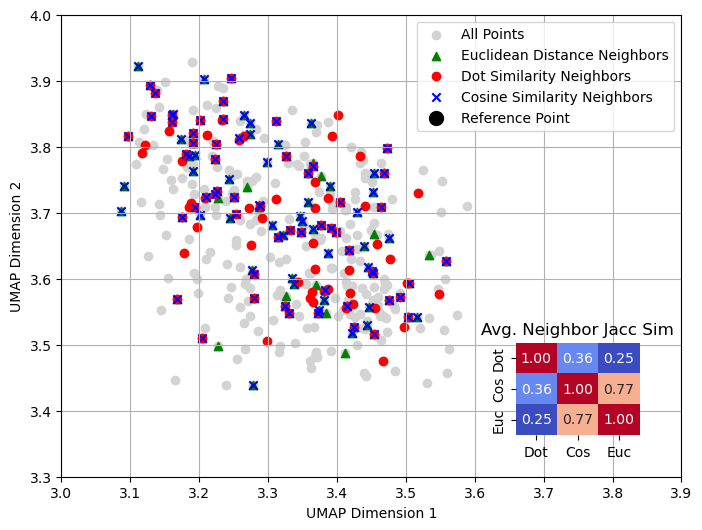

In [203]:
# Get 2D coordinates of the reference point and neighbors
reference_point_2d = data_2d[reference_index]
dot_neighbors_2d = data_2d[dot_neighbors[0]]
cosine_neighbors_2d = data_2d[cosine_neighbors[0]]
euclidean_neighbors_2d = data_2d[euclidean_neighbors[0]]

# Step 5: Plotting with Inset for similarity matrix
fig, ax = plt.subplots(figsize=(8, 6))

# Main scatter plot for all points in light gray
ax.scatter(data_2d[:, 0], data_2d[:, 1], color='lightgray', label="All Points")

# Plot neighbors for each metric with different markers and colors
ax.scatter(euclidean_neighbors_2d[:, 0], euclidean_neighbors_2d[:, 1], color='green', marker='^', label="Euclidean Distance Neighbors")
ax.scatter(dot_neighbors_2d[:, 0], dot_neighbors_2d[:, 1], color='red', marker='o', label="Dot Similarity Neighbors")
ax.scatter(cosine_neighbors_2d[:, 0], cosine_neighbors_2d[:, 1], color='blue', marker='x', label="Cosine Similarity Neighbors")

# Highlight the reference point
ax.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100, label="Reference Point")

# Set axis labels and limits
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
#ax.set_title("64D to 2D: Neighbor Comparison by Metric")
ax.legend(loc="best")
ax.set_xlim([3,3.9])
ax.set_ylim([3.3,4])
ax.grid(True)

# Step 6: Calculate Jaccard similarity between neighbors and add similarity matrix heatmap
neighbors_sets = {
    "Dot": set(dot_neighbors[0]),
    "Cos": set(cosine_neighbors[0]),
    "Euc": set(euclidean_neighbors[0])
}
similarity_matrix = np.zeros((3, 3))
metrics = ["Dot", "Cos", "Euc"]
for i, metric1 in enumerate(metrics):
    for j, metric2 in enumerate(metrics):
        intersection = neighbors_sets[metric1].intersection(neighbors_sets[metric2])
        union = neighbors_sets[metric1].union(neighbors_sets[metric2])
        similarity_matrix[i, j] = len(intersection) / len(union) if union else 0


# Add similarity matrix heatmap inset
axins_heatmap = inset_axes(ax, width="20%", height="20%", loc="lower right", borderpad=3)
sns.heatmap(avg_similarity_matrix_64d, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=axins_heatmap)
axins_heatmap.set_title("Avg. Neighbor Jacc Sim")
plt.savefig("/nobackup/gogandhi/alt_means_sans_k/results/Changing clustering metric/random_clusters_64d_metric.png",dpi=300,bbox_inches="tight")

plt.show()

In [ ]:


# Calculate similarity for each node and accumulate
for reference_index in range(len(data_64d)):
    _, dot_neighbors = index_dot_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)
    _, cosine_neighbors = index_cosine_2d.search(np.array([data_2d_normalized[reference_index]], dtype=np.float32), neighbors_count)
    _, euclidean_neighbors = index_euclidean_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)

    # Create neighbor sets
    neighbors_sets = {
        "Dot": set(dot_neighbors[0]),
        "Cos": set(cosine_neighbors[0]),
        "Euc": set(euclidean_neighbors[0])
    }

    # Calculate Jaccard similarity for each pair of metrics
    similarity_matrix = np.zeros((3, 3))
    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            intersection = neighbors_sets[metric1].intersection(neighbors_sets[metric2])
            union = neighbors_sets[metric1].union(neighbors_sets[metric2])
            similarity_matrix[i, j] = len(intersection) / len(union) if union else 0

    # Accumulate the similarity matrix
    avg_similarity_matrix += similarity_matrix

# Average the similarity matrix across all nodes
avg_similarity_matrix /= len(data_2d)

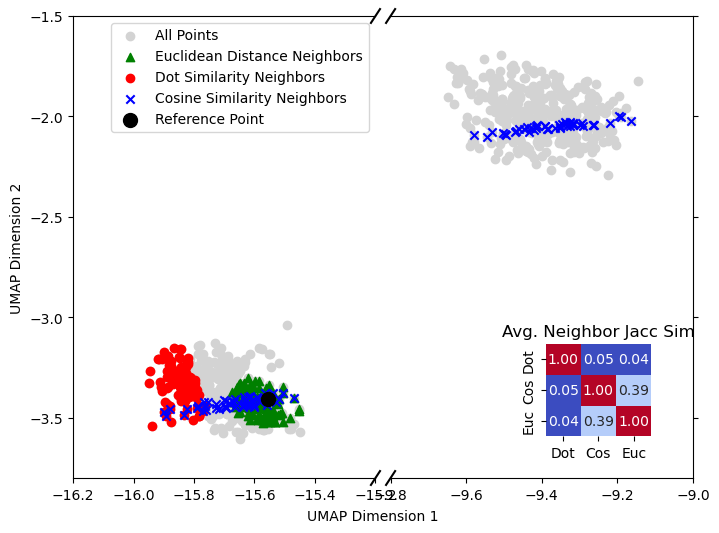

In [202]:
# Step 4: Initialize FAISS indices in 2D space for dot, cosine, and Euclidean metrics
index_dot_2d = faiss.IndexFlatIP(2)         # Dot product similarity
index_cosine_2d = faiss.IndexFlatIP(2)      # Cosine similarity (normalize data)
index_euclidean_2d = faiss.IndexFlatL2(2)   # Euclidean distance

# Normalize data for cosine similarity in 2D
data_2d_normalized = data_2d / np.linalg.norm(data_2d, axis=1, keepdims=True)

# Add data to FAISS indices in 2D space
index_dot_2d.add(data_2d.astype(np.float32))
index_cosine_2d.add(data_2d_normalized.astype(np.float32))
index_euclidean_2d.add(data_2d.astype(np.float32))

# Choose a reference point in 2D and find neighbors in the 2D space
reference_index = 821  # Example index
reference_point_2d = data_2d[reference_index]

# Retrieve neighbors in 2D space for each metric
_, dot_neighbors_2d = index_dot_2d.search(np.array([reference_point_2d], dtype=np.float32), neighbors_count)
_, cosine_neighbors_2d = index_cosine_2d.search(np.array([data_2d_normalized[reference_index]], dtype=np.float32), neighbors_count)
_, euclidean_neighbors_2d = index_euclidean_2d.search(np.array([reference_point_2d], dtype=np.float32), neighbors_count)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import faiss
import umap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming you have already performed the neighbor searches and have:
# data_2d, data_2d_normalized, dot_neighbors_2d, cosine_neighbors_2d, euclidean_neighbors_2d,
# reference_point_2d, avg_similarity_matrix_2d, metrics

# Define the x-axis ranges you want to display
x_range1 = [-16.2, -15.2]
x_range2 = [-9.8, -9]
y_range = [-3.8, -1.5]

# Create subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 6), gridspec_kw={'width_ratios': [1, 1]})

# Adjust the space between subplots
fig.subplots_adjust(wspace=0.05)

# Plot data on the first subplot (left side)
ax1.scatter(data_2d[:, 0], data_2d[:, 1], color='lightgray', label="All Points")
ax1.scatter(data_2d[euclidean_neighbors_2d[0], 0], data_2d[euclidean_neighbors_2d[0], 1],
            color='green', marker='^', label="Euclidean Distance Neighbors")
ax1.scatter(data_2d[dot_neighbors_2d[0], 0], data_2d[dot_neighbors_2d[0], 1],
            color='red', marker='o', label="Dot Similarity Neighbors")
ax1.scatter(data_2d[cosine_neighbors_2d[0], 0], data_2d[cosine_neighbors_2d[0], 1],
            color='blue', marker='x', label="Cosine Similarity Neighbors")
ax1.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100, label="Reference Point")

# Set axis limits for the first subplot
ax1.set_xlim(x_range1)
ax1.set_ylim(y_range)

# Remove the spines between the subplots
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright=False)
ax2.yaxis.tick_right()

# Plot data on the second subplot (right side)
ax2.scatter(data_2d[:, 0], data_2d[:, 1], color='lightgray')
ax2.scatter(data_2d[euclidean_neighbors_2d[0], 0], data_2d[euclidean_neighbors_2d[0], 1],
            color='green', marker='^')
ax2.scatter(data_2d[dot_neighbors_2d[0], 0], data_2d[dot_neighbors_2d[0], 1],
            color='red', marker='o')
ax2.scatter(data_2d[cosine_neighbors_2d[0], 0], data_2d[cosine_neighbors_2d[0], 1],
            color='blue', marker='x')
ax2.scatter(reference_point_2d[0], reference_point_2d[1], color='black', s=100)

# Set axis limits for the second subplot
ax2.set_xlim(x_range2)
ax2.set_ylim(y_range)

# Add axis labels and title
fig.text(0.5, 0.04, 'UMAP Dimension 1', ha='center')
ax1.set_ylabel('UMAP Dimension 2')
#fig.suptitle('2D Community Structure with Neighbor Comparison (Broken X-Axis)')

# Add legends to the first subplot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='best')

# Add diagonal lines to indicate the broken axis
d = .015  # Size of diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the right axes
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

# Add similarity matrix heatmap inset
axins_heatmap = inset_axes(ax2, width="35%", height="20%", loc="lower right", borderpad=3)
sns.heatmap(avg_similarity_matrix_2d, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=axins_heatmap)
axins_heatmap.set_title("Avg. Neighbor Jacc Sim")

plt.savefig("/nobackup/gogandhi/alt_means_sans_k/results/Changing clustering metric/random_clusters_2d_metric.png",dpi=300, bbox_inches="tight")
plt.show()


/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Average Neighbor Similarity Matrix in 64D (Jaccard Similarity):
[[1.         0.35527112 0.24734698]
 [0.35527112 1.         0.76894021]
 [0.24734698 0.76894021 1.        ]]
Average Neighbor Similarity Matrix in 2D (Jaccard Similarity):
[[1.         0.04716412 0.0446179 ]
 [0.04716412 1.         0.39490786]
 [0.0446179  0.39490786 1.        ]]


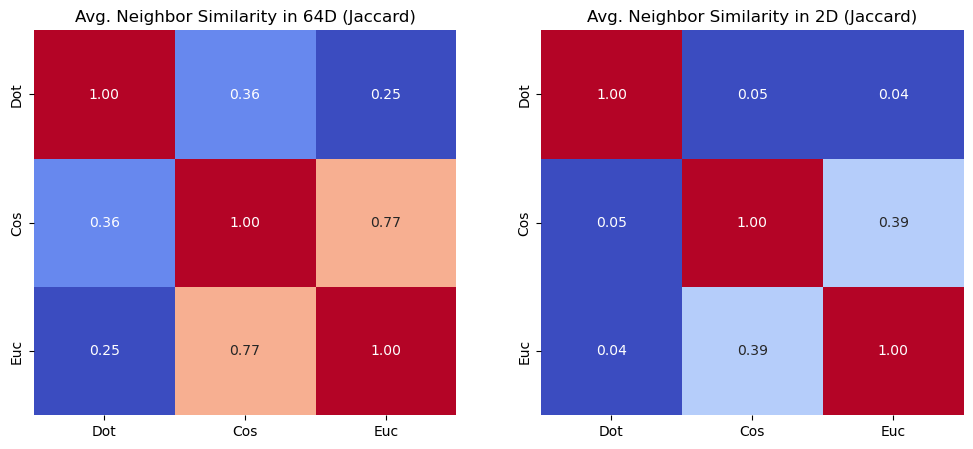

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import faiss
import umap

# Parameters
neighbors_count = 100
metrics = ["Dot", "Cos", "Euc"]

# Step 1: Calculate 64D cluster centers and spreads based on `emb`
community_stats = community_table.groupby('community_id')['node_id'].apply(
    lambda nodes: (emb[nodes].mean(axis=0), emb[nodes].std(axis=0))
)

# Separate centers and spreads for easier processing
cluster_centers = np.vstack([stat[0] for stat in community_stats])
cluster_spreads = np.vstack([stat[1] for stat in community_stats])

# Step 2: Generate synthetic 64D data based on these centers and spreads
num_points_per_cluster = len(emb) // len(cluster_centers)
np.random.seed(42)
data_64d = np.vstack([
    center + np.random.randn(num_points_per_cluster, 64) * spread
    for center, spread in zip(cluster_centers, cluster_spreads)
])

# Step 3: Initialize FAISS indices in 64D space
index_dot_64d = faiss.IndexFlatIP(64)
index_cosine_64d = faiss.IndexFlatIP(64)
index_euclidean_64d = faiss.IndexFlatL2(64)

# Normalize data for cosine similarity in 64D
data_64d_normalized = data_64d / np.linalg.norm(data_64d, axis=1, keepdims=True)

# Add data to FAISS indices in 64D space
index_dot_64d.add(data_64d.astype(np.float32))
index_cosine_64d.add(data_64d_normalized.astype(np.float32))
index_euclidean_64d.add(data_64d.astype(np.float32))

# Step 4: Perform UMAP reduction on 64D data to 2D for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_2d = umap_reducer.fit_transform(data_64d)

# Initialize FAISS indices in 2D space
index_dot_2d = faiss.IndexFlatIP(2)
index_cosine_2d = faiss.IndexFlatIP(2)
index_euclidean_2d = faiss.IndexFlatL2(2)

# Normalize data for cosine similarity in 2D
data_2d_normalized = data_2d / np.linalg.norm(data_2d, axis=1, keepdims=True)

# Add data to FAISS indices in 2D space
index_dot_2d.add(data_2d.astype(np.float32))
index_cosine_2d.add(data_2d_normalized.astype(np.float32))
index_euclidean_2d.add(data_2d.astype(np.float32))

# Step 5: Calculate average similarity matrix across all nodes in both 64D and 2D spaces

# Initialize matrices for accumulating Jaccard similarities
avg_similarity_matrix_64d = np.zeros((3, 3))
avg_similarity_matrix_2d = np.zeros((3, 3))

# Calculate similarity for each node in both 64D and 2D spaces and accumulate
for reference_index in range(len(data_64d)):
    # Neighbor search in 64D space
    _, dot_neighbors_64d = index_dot_64d.search(np.array([data_64d[reference_index]], dtype=np.float32), neighbors_count)
    _, cosine_neighbors_64d = index_cosine_64d.search(np.array([data_64d_normalized[reference_index]], dtype=np.float32), neighbors_count)
    _, euclidean_neighbors_64d = index_euclidean_64d.search(np.array([data_64d[reference_index]], dtype=np.float32), neighbors_count)
    
    # Neighbor search in 2D space
    _, dot_neighbors_2d = index_dot_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)
    _, cosine_neighbors_2d = index_cosine_2d.search(np.array([data_2d_normalized[reference_index]], dtype=np.float32), neighbors_count)
    _, euclidean_neighbors_2d = index_euclidean_2d.search(np.array([data_2d[reference_index]], dtype=np.float32), neighbors_count)
    
    # Create neighbor sets for 64D space
    neighbors_sets_64d = {
        "Dot": set(dot_neighbors_64d[0]),
        "Cos": set(cosine_neighbors_64d[0]),
        "Euc": set(euclidean_neighbors_64d[0])
    }
    
    # Create neighbor sets for 2D space
    neighbors_sets_2d = {
        "Dot": set(dot_neighbors_2d[0]),
        "Cos": set(cosine_neighbors_2d[0]),
        "Euc": set(euclidean_neighbors_2d[0])
    }
    
    # Calculate Jaccard similarity for each pair of metrics in 64D space
    similarity_matrix_64d = np.zeros((3, 3))
    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            intersection = neighbors_sets_64d[metric1].intersection(neighbors_sets_64d[metric2])
            union = neighbors_sets_64d[metric1].union(neighbors_sets_64d[metric2])
            similarity_matrix_64d[i, j] = len(intersection) / len(union) if union else 0
    avg_similarity_matrix_64d += similarity_matrix_64d
    
    # Calculate Jaccard similarity for each pair of metrics in 2D space
    similarity_matrix_2d = np.zeros((3, 3))
    for i, metric1 in enumerate(metrics):
        for j, metric2 in enumerate(metrics):
            intersection = neighbors_sets_2d[metric1].intersection(neighbors_sets_2d[metric2])
            union = neighbors_sets_2d[metric1].union(neighbors_sets_2d[metric2])
            similarity_matrix_2d[i, j] = len(intersection) / len(union) if union else 0
    avg_similarity_matrix_2d += similarity_matrix_2d

# Average the similarity matrices across all nodes
avg_similarity_matrix_64d /= len(data_64d)
avg_similarity_matrix_2d /= len(data_2d)

print("Average Neighbor Similarity Matrix in 64D (Jaccard Similarity):")
print(avg_similarity_matrix_64d)

print("Average Neighbor Similarity Matrix in 2D (Jaccard Similarity):")
print(avg_similarity_matrix_2d)

# Step 6: Plot average similarity matrices as heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for 64D similarity matrix
sns.heatmap(avg_similarity_matrix_64d, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=ax1)
ax1.set_title("Avg. Neighbor Similarity in 64D (Jaccard)")

# Heatmap for 2D similarity matrix
sns.heatmap(avg_similarity_matrix_2d, annot=True, fmt=".2f", cmap="coolwarm", cbar=False,
            xticklabels=metrics, yticklabels=metrics, ax=ax2)
ax2.set_title("Avg. Neighbor Similarity in 2D (Jaccard)")

plt.show()
